# Image Extraction from Maxar SecureWatch WMTS

### _Import functional dependencies and add repository source directory to system path_

In [1]:
import os
import yaml
from munch import munchify

In [2]:
# define repo name and get root working directory
repo = 'wmts-extractor'
root_path = os.getcwd()[ 0 : os.getcwd().find( repo ) + len ( repo )]
root_path

'C:\\Users\\Chris.Williams\\Documents\\GitHub\\wmts-extractor'

In [3]:
# add repo source + notebooks directory to system path
import sys
sys.path.insert(0, os.path.join( root_path, 'src' ) )

In [4]:
# get path to configuration files
cfg_path = os.path.join( root_path, 'cfg' )
cfg_path

'C:\\Users\\Chris.Williams\\Documents\\GitHub\\wmts-extractor\\cfg'

In [5]:
# get path to configuration files
test_path = os.path.join( root_path, 'notebooks' )
test_path = os.path.join( test_path, 'test' )
test_path

'C:\\Users\\Chris.Williams\\Documents\\GitHub\\wmts-extractor\\notebooks\\test'

### _Load configuration file and tweak settings_ 

In [6]:
# define configuration file
cfg_file = os.path.join( cfg_path, 'securewatch.yml' )

In [7]:
# print contents of configuration file
with open( cfg_file ) as f:
    print ( f.read() )

endpoint:
    name: securewatch
    credentials:
        username: XXXXX
        password: XXXXX
    id: XXXXX
    uri: https://securewatch.digitalglobe.com/earthservice/wmtsaccess
    type: slippy
    layer: DigitalGlobe:ImageryTileService
    format: png
    tilematrixset: EPSG:3857
    profile: Currency_RGB_Profile 
aoi:
    pathname: 'C:\Users\Chris.Williams\Documents\GitHub\wmts-extractor\notebooks\test\points.shp'
    field: Name



In [8]:
# load cfg file using yaml parser
with open( cfg_file, 'r' ) as f:
    config = munchify( yaml.safe_load( f ) )

In [9]:
# setup authentication details 
config.endpoint.credentials.username = <securewatch user name>
config.endpoint.credentials.password = <securewatch password>
config.endpoint.id = <securewatch connect_id>

### _Run test scenario for file comprising comma separated list of latlons_

In [10]:
# print contents of test file
config.aoi.pathname = os.path.join( test_path, 'points.csv' )
with open( config.aoi.pathname ) as f:
    print ( f.read() )

Longitude,Latitude,Name
-2.648941,51.208953,"Home"
-3.059692,53.821306,"Football_Heaven"



In [11]:
# convert csv file to shapefile - run from command prompt
# ogr2ogr -s_srs EPSG:4326 -t_srs EPSG:4326 -oo X_POSSIBLE_NAMES=Lon* -oo Y_POSSIBLE_NAMES=Lat* -f "ESRI Shapefile" points.shp points.csv

In [12]:
# update aoi pathname to test data
config.aoi.pathname = os.path.join( test_path, 'points.shp' )

### _Setup command line arguments and run extraction_

In [13]:
from datetime import datetime

# initialise args
args = { 
        'zoom' : 15,  # wmts tile matrix zoom level (1-20)
        'out_path' : os.path.join( test_path, 'out_csv' ),  # output path
        
        'start_datetime' : datetime.strptime( '01/01/2019 00:00:00', '%d/%m/%Y %H:%M:%S' ), # start date
        'end_datetime' : datetime.strptime( '31/12/2019 23:59:59', '%d/%m/%Y %H:%M:%S' ), # end date
        'max_cloud' : 20, # max percentage cloud cover
        'features' : None,  # default - no specific feature ids
        'overlap' : 10, # default overlap
        'aois' : None,  # default - all aois
        'platforms' : None,  # default - all platforms

        'overwrite' : True, # overwrite existing images
        'info_only' : True,  # return metadata only   
        'max_downloads' : 1,  # download only 1 image per aoi
        'dirs' : None, # default - ordering of output path
        'format' : 'GTiff', # default - GeoTIFF GDAL format identifier
        'options' : 'TILED=YES COMPRESS=LZW' # default GDAL creation options
}
args = munchify(args)
args

Munch({'zoom': 15, 'out_path': 'C:\\Users\\Chris.Williams\\Documents\\GitHub\\wmts-extractor\\notebooks\\test\\out_csv', 'start_datetime': datetime.datetime(2019, 1, 1, 0, 0), 'end_datetime': datetime.datetime(2019, 12, 31, 23, 59, 59), 'max_cloud': 20, 'features': None, 'overlap': 10, 'aois': None, 'platforms': None, 'overwrite': True, 'info_only': True, 'max_downloads': 1, 'dirs': None, 'format': 'GTiff', 'options': 'TILED=YES COMPRESS=LZW'})

In [14]:
# create instance of extractor class
from extractor import Extractor
obj = Extractor( config, args )

In [15]:
# return catalogue metadata records only
obj.process( config, args )

Image Inventory for AoI: Home
       platform                               uid                      product        acq_datetime  cloud_cover resolution     overlap
0  WorldView-02  5c4b6dbf8707706eb4b44a91d9ffb93d  Pan Sharpened Natural Color 2021-07-19 11:36:27  0.022758     0.46cm     100.000000
1  WorldView-02  d327d30302f9b80b32b0528e69a6d10c  Pan Sharpened Natural Color 2021-07-08 11:40:53  0.312037     0.46cm     100.000000
2  WorldView-02  0ef4dac7cf0c8f4b07a998cf04268140  Pan Sharpened Natural Color 2019-07-23 11:22:17  0.000000     0.46cm     100.000000
3  GeoEye-01     bb99af2c934bd6f40402a9899a53744b  Pan Sharpened Natural Color 2019-07-15 10:57:46  0.105942     0.46cm     100.000000
4  WorldView-03  5e385fc197ac39146a5dd9b3c0179c0d  Pan Sharpened Natural Color 2019-07-10 11:52:50  0.266183     0.31cm     21.732156 
5  WorldView-02  f51f6c31164bacdadbadf5eb8a51815a  Pan Sharpened Natural Color 2019-07-07 11:11:18  0.128177     0.46cm     100.000000
6  GeoEye-01     5d1d7a5b

### _Rerun extraction and download imagery collocated with point geometries_

In [16]:
# generate images
args.info_only = False
obj.process( config, args )

Image Inventory for AoI: Home
       platform                               uid                      product        acq_datetime  cloud_cover resolution     overlap
0  WorldView-02  5c4b6dbf8707706eb4b44a91d9ffb93d  Pan Sharpened Natural Color 2021-07-19 11:36:27  0.022758     0.46cm     100.000000
1  WorldView-02  d327d30302f9b80b32b0528e69a6d10c  Pan Sharpened Natural Color 2021-07-08 11:40:53  0.312037     0.46cm     100.000000
2  WorldView-02  0ef4dac7cf0c8f4b07a998cf04268140  Pan Sharpened Natural Color 2019-07-23 11:22:17  0.000000     0.46cm     100.000000
3  GeoEye-01     bb99af2c934bd6f40402a9899a53744b  Pan Sharpened Natural Color 2019-07-15 10:57:46  0.105942     0.46cm     100.000000
4  WorldView-03  5e385fc197ac39146a5dd9b3c0179c0d  Pan Sharpened Natural Color 2019-07-10 11:52:50  0.266183     0.31cm     21.732156 
5  WorldView-02  f51f6c31164bacdadbadf5eb8a51815a  Pan Sharpened Natural Color 2019-07-07 11:11:18  0.128177     0.46cm     100.000000
6  GeoEye-01     5d1d7a5b

### _Load and visualise downloaded imagery downloaded via SecureWatch WMTS_

In [17]:
# locate TIF files in test path
import glob
images = glob.glob( os.path.join( args.out_path, '**/*.TIF' ), recursive=True )
images

['C:\\Users\\Chris.Williams\\Documents\\GitHub\\wmts-extractor\\notebooks\\test\\out_csv\\securewatch\\Best-Football-Team\\WorldView-02\\20190910_111510\\Best-Football-Team_20190910111510_15_1000_0a0183c6a0828aba909a35ce10d21f30.TIF',
 'C:\\Users\\Chris.Williams\\Documents\\GitHub\\wmts-extractor\\notebooks\\test\\out_csv\\securewatch\\Home\\WorldView-02\\20190723_112217\\Home_20190723112217_15_1000_0ef4dac7cf0c8f4b07a998cf04268140.TIF']

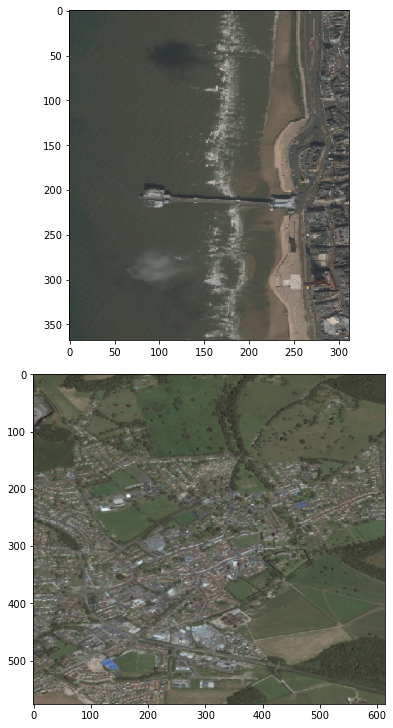

In [18]:
import gdal
import matplotlib.pyplot as plt 

# create figure and grid
fig, axes = plt.subplots(   figsize=(20,10), 
                            nrows=len( images ), 
                            ncols=1, 
                            constrained_layout=True )

# iterate through dataframe
for idx, image in enumerate( images ):

    ds = gdal.Open( image )
    if ds is not None:

        # load image
        data = ds.ReadAsArray()
        data = data[:3,:,:]
    
        # plot image
        axes[ idx ].imshow( data.transpose( 1, 2, 0 ) )

# show figure
plt.show()